In [15]:
#Import the libraries 
import numpy as np
import os
import scipy.io
from scipy.io import savemat 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [16]:
#load the dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [17]:
#Convert the X values of the dataset into the pandas format to help visualize the data better
digits_df_X = pd.DataFrame(digits.data, columns = digits.feature_names)
digits_df_X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
#Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


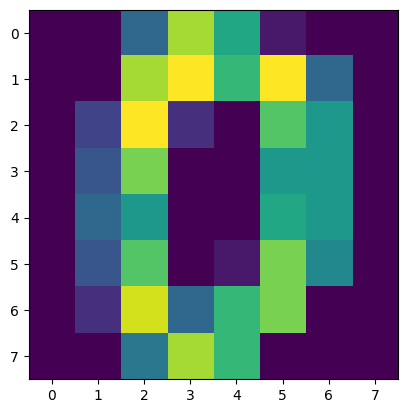

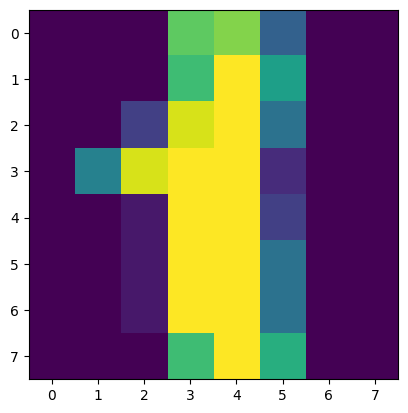

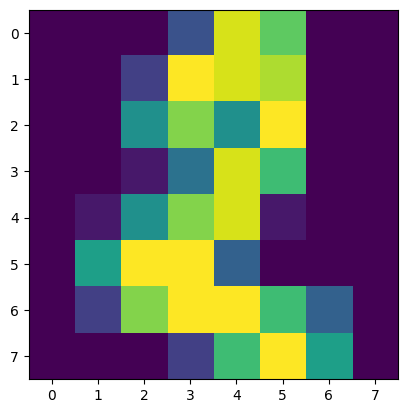

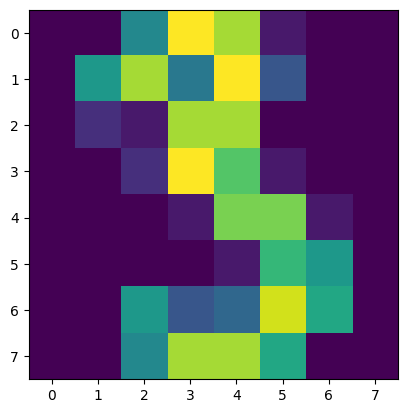

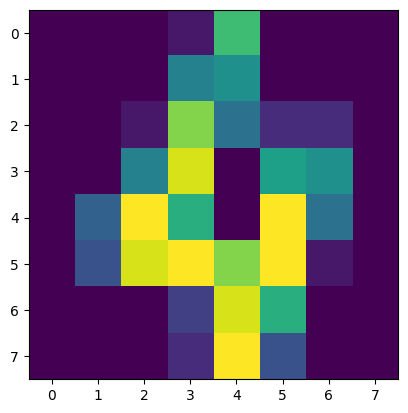

In [19]:
#Create a loop to diaply a range of numbers form the dataset
for i in range(5):
    plt.imshow(digits.images[i])
    plt.show()

In [20]:
#Identify the X and y values of the digits data 
X = digits.data
y = digits.target

In [21]:
#Import the train_test_split function 
from sklearn.model_selection import train_test_split

#Split the data onto train and test sets, in order to see how well your data can possibly predict results(using the test data set) after being trined(using trining data sets)
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25,random_state=7)

In [22]:


#Use Random Forest Classifier to create a classification model 
random_forest = RandomForestClassifier(n_estimators = 600, random_state=8)

#Import the GridSerachCV in order to indentify which value of the chosen model paramenter is the best for testing 
from sklearn.model_selection import GridSearchCV

#I have chosen to tune the max_depth paramenter, as I think I was able to understand that the n_estimator tunning positivly and 
#directly correlates to the accuracy increase upon increasing the n_estimator values, as it increases the number of tree models 
#created, making the avarage value taken from those models more accurate. 
param_grid = {'max_depth': [6, 8, 10, 12, 15, 18, 20] }  
grid = GridSearchCV(random_forest, param_grid)
grid.fit(X_test, y_test)
print(grid.best_params_)

#predict and reshape the X_test values 
y_pred =  grid.predict(X_test).reshape(-1,1)
#According to the usage of the GridSerachCV, the best suited max_depth parameter is 12 

{'max_depth': 12}


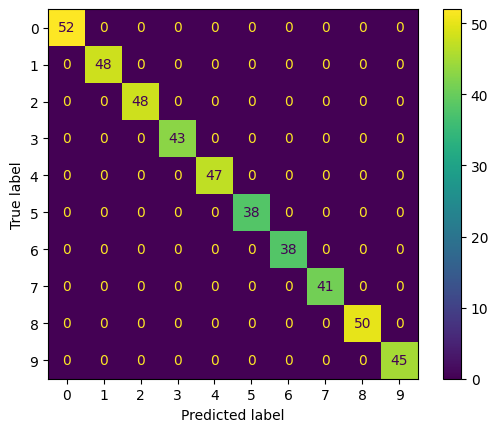

In [23]:
#Import the confusion_matrix function and the ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#predict and reshape the X_test values 

#generate a confusion matrix 
conf_mat = confusion_matrix(y_test, y_pred)
cm_df = ConfusionMatrixDisplay(conf_mat)
cm_df.plot()

I believe that the model created such an output within the confusion matrix in order to be able to build the images of numbers, displayed previously. As the predicted pixel label "number" directly correlated with the true label "number", representing the colour coordination. Meaning that, the model predicted the values accurately, matching the true labels with the predicted lables.

In [25]:
#Import the f1_score, precision_score, recall_score functions 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

#Use those functions to obtain the values from the X and y test values 
av_f1 = f1_score(y_test, y_pred, average = 'micro')
prec = precision_score(y_test, y_pred, average  = 'micro' )
rec = recall_score(y_test, y_pred, average  = 'micro' )
accuracy = accuracy_score(y_test, y_pred)

#Display those values 
print("Precision:", prec)
print("Recall:", rec)
print("F1 score", av_f1)
print("Accuracy:", accuracy)


Precision: 1.0
Recall: 1.0
F1 score 1.0
Accuracy: 1.0
